In [4]:
from shapely.geometry import Point # Use in geospatial environment
import pandas as pd
import geopandas as gpd # Use in geospatial environment
import matplotlib.pyplot as plt
import folium #Use in geospatial environment
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [7]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37203,33,NASHVILLE,93532.890729543782,120334624.37817383,"MULTIPOLYGON (((-86.78734 36.16688, -86.78711 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
4,37246,57,NASHVILLE,2247.4521491892065,315078.17651367187,"MULTIPOLYGON (((-86.79052 36.15846, -86.79107 ..."


In [8]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

In [9]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   zip             57 non-null     object  
 1   objectid        57 non-null     object  
 2   po_name         57 non-null     object  
 3   shape_stlength  57 non-null     object  
 4   shape_starea    57 non-null     object  
 5   geometry        57 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 2.8+ KB


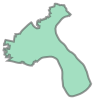

In [10]:
zipcodes.loc[0,'geometry']

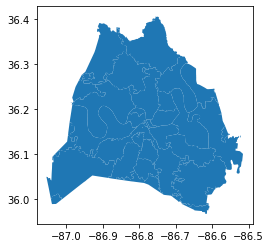

In [11]:
zipcodes.plot();

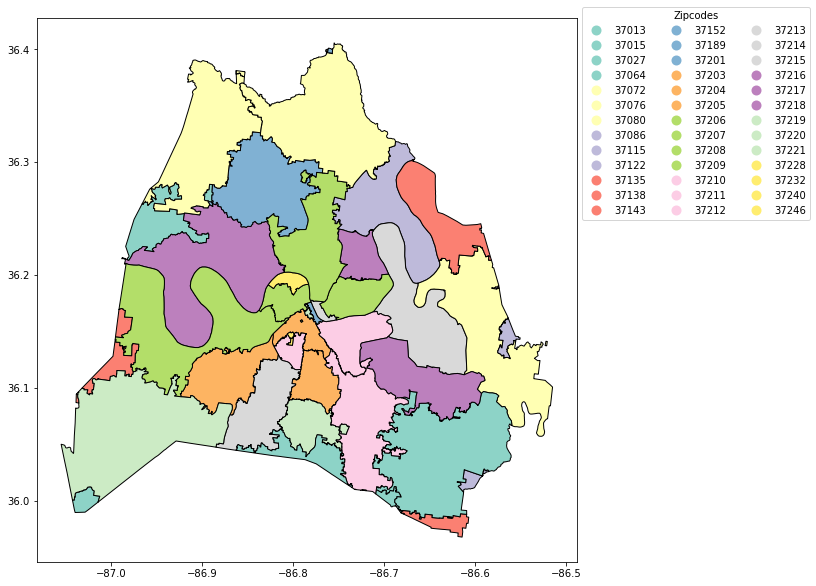

In [12]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 3}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

In [25]:
may_trips_pkl = pd.read_pickle('../data/may_trips.pkl')
print(may_trips_pkl.shape)
may_trips_pkl.head()

(224969, 10)


,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance,startLatitude,endLatitude,startLongitude,endLongitude
0,2019-05-01 00:00:55.423,BRD2134,"[[36.157235,-86.803612],[36.157235,-86.80362],...",Powered9EAJL,3.0000,958.00528,36.15710,36.15660,-86.80360,-86.80670
1,2019-05-01 00:03:33.147,LFT5,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",Powered296631,1.7156,1371.39112,36.15797,36.16054,-86.77896,-86.77689
2,2019-05-01 00:05:55.570,BRD2168,"[[36.155068,-86.782124],[36.156597,-86.78675]]",Powered7S2UU,3.0000,2296.58800,36.15470,36.15650,-86.78180,-86.78680
3,2019-05-01 00:05:55.570,BRD2166,"[[36.149741,-86.779344],[36.149741,-86.779327]...",PoweredZIIVX,3.0000,1200.78744,36.14940,36.15310,-86.77950,-86.77960
4,2019-05-01 00:05:55.570,BRD2165,"[[36.177699,-86.786477],[36.177711,-86.786469]...",PoweredJ7MB3,2.0000,351.04988,36.17780,36.17740,-86.78660,-86.78760


In [26]:
may_trips_pkl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   pubTimeStamp    224969 non-null  datetime64[ns]
 1   tripRecordNum   224969 non-null  object        
 2   tripRoute       224969 non-null  object        
 3   sumdID          224969 non-null  object        
 4   tripDuration    224969 non-null  float64       
 5   tripDistance    224969 non-null  float64       
 6   startLatitude   224969 non-null  float64       
 7   endLatitude     224969 non-null  float64       
 8   startLongitude  224969 non-null  float64       
 9   endLongitude    224969 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 17.2+ MB


In [28]:
may_trips_pkl.loc[0].startLatitude

36.1571

In [29]:
may_trips_pkl['geometry'] = may_trips_pkl.apply(lambda x: Point((x.startLongitude, x.startLatitude)), 
                                        axis=1)
may_trips_pkl.head(3)

,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance,startLatitude,endLatitude,startLongitude,endLongitude,geometry
0,2019-05-01 00:00:55.423,BRD2134,"[[36.157235,-86.803612],[36.157235,-86.80362],...",Powered9EAJL,3.0000,958.00528,36.15710,36.15660,-86.80360,-86.80670,POINT (-86.8036 36.1571)
1,2019-05-01 00:03:33.147,LFT5,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",Powered296631,1.7156,1371.39112,36.15797,36.16054,-86.77896,-86.77689,POINT (-86.77896 36.15797)
2,2019-05-01 00:05:55.570,BRD2168,"[[36.155068,-86.782124],[36.156597,-86.78675]]",Powered7S2UU,3.0000,2296.58800,36.15470,36.15650,-86.78180,-86.78680,POINT (-86.7818 36.1547)


In [30]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
may_scooter_geo = gpd.GeoDataFrame(may_trips_pkl, 
                           crs = zipcodes.crs, 
                           geometry = may_trips_pkl['geometry'])

In [34]:
type(may_trips_pkl)

pandas.core.frame.DataFrame

In [35]:
type(may_scooter_geo)

geopandas.geodataframe.GeoDataFrame